In [1]:
%load_ext autoreload
%autoreload 2

##  we're using the following packages (see requirements.txt for more):

#   msapy == 1.1.0
#   netneurotools (unclear version but the branch is merged on Oct 5, 2022)
#   numpy == 1.20.3
#   numba == 0.56.4
#   pandas == 1.3.5 ##### make sure it's not 1.5 otherwise somehow the causal influence matrices shift and we still don't know why because the tests all pass with both versions!
#   bctpy == 0.6.0
#   networkx == 3.0

In [2]:
import numpy as np
from msapy import msa, plottings as pl
import matplotlib.pyplot as plt
import networkx as nx
import seaborn as sns
import utils as ut
import pandas as pd
import netneurotools.datasets
from netneurotools.metrics import communicability_wei, communicability_bin
from netneurotools.plotting import plot_fsaverage
from scipy.stats import pearsonr
import warnings
from mayavi import mlab

Qt: Session management error: None of the authentication protocols specified are supported


In [3]:
SEED = 2023
pl.set_style(font_size=8)
my_colors = ['#006685', '#3FA5C4', '#FFFFFF', '#E84653', '#BF003F']
my_reds = ['#FFFFFF', '#E84653', '#BF003F']
my_blues = ['#FFFFFF', '#3FA5C4', '#006685']
colormap = sns.blend_palette(my_colors,as_cmap=True)
redmap = sns.blend_palette(my_reds,as_cmap=True)
bluemap = sns.blend_palette(my_blues,as_cmap=True)

sagittal=(0, 180)
axial=(90, 180)
coronal=(0, 90)
bottom=(-90,0)

In [4]:
rng = np.random.default_rng(seed=SEED)
chain = nx.to_numpy_array(nx.generators.path_graph(6,nx.DiGraph())).T


closedchain = chain.copy()
closedchain[0,5]=1
closedchain = ut.spectral_normalization(0.9,closedchain)

chain *= 0.9

symmetricchain = nx.to_numpy_array(nx.generators.path_graph(6))
symmetricchain = ut.spectral_normalization(0.9,symmetricchain)

timesteps = 100
example_input = ut.event_maker(6,timesteps)
#example_input = rng.normal(0,1,(6,timesteps))

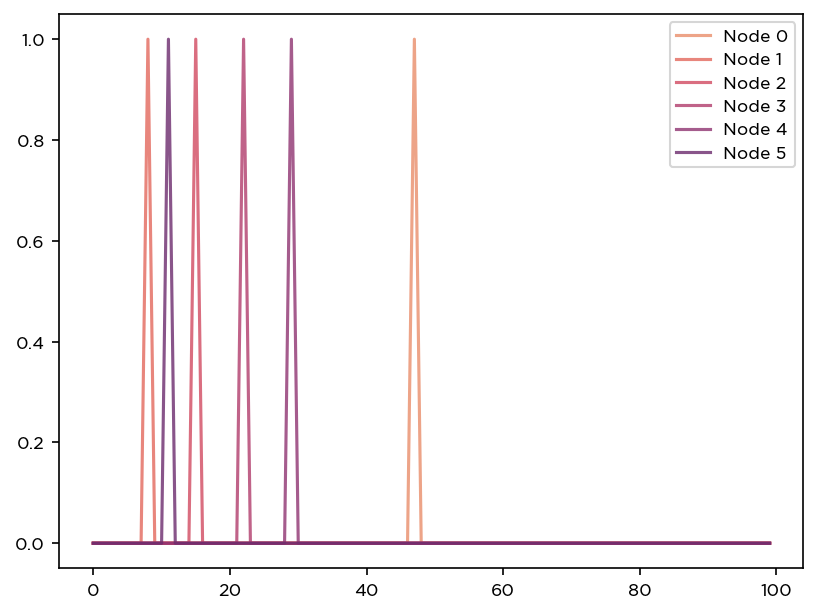

In [5]:
plt.figure(dpi=150)
with sns.color_palette("flare",n_colors=example_input.shape[0]):
    plt.plot(example_input.T,alpha=0.8)
plt.legend(['Node 0','Node 1','Node 2','Node 3','Node 4','Node 5']);

In [6]:
warnings.filterwarnings("ignore")

simple_chain_dynamics = ut.simple_dynamical_system(adjacency_matrix=chain,
                                                   input_matrix=example_input,
                                                   function=ut.identity)
closed_chain_dynamics = ut.simple_dynamical_system(closedchain,example_input,function=ut.identity)
symmetric_chain_dynamics = ut.simple_dynamical_system(symmetricchain,example_input,function=ut.identity)

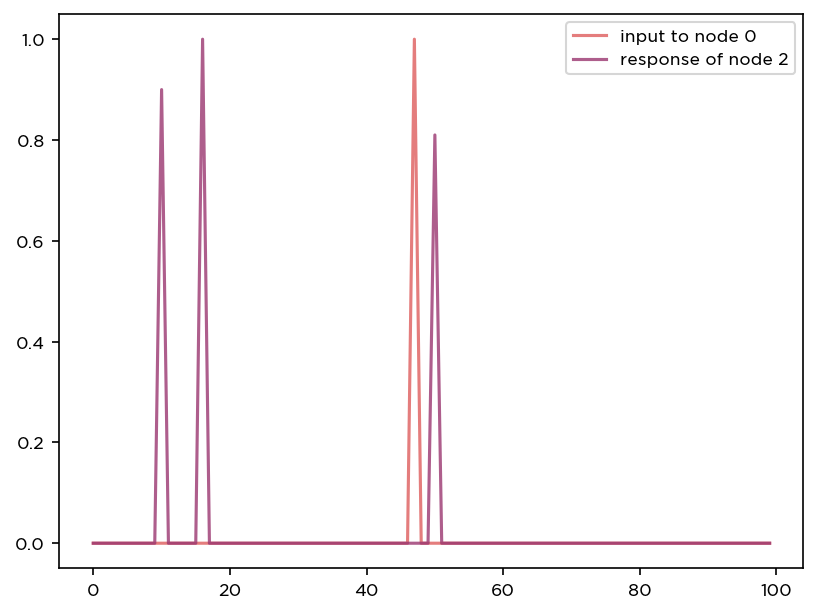

In [7]:
plt.figure(dpi=150)
with sns.color_palette("flare",n_colors=2):
    plt.plot(example_input[0],alpha=0.8)
    plt.plot(simple_chain_dynamics[2],alpha=0.8)

plt.legend(['input to node 0','response of node 2']);


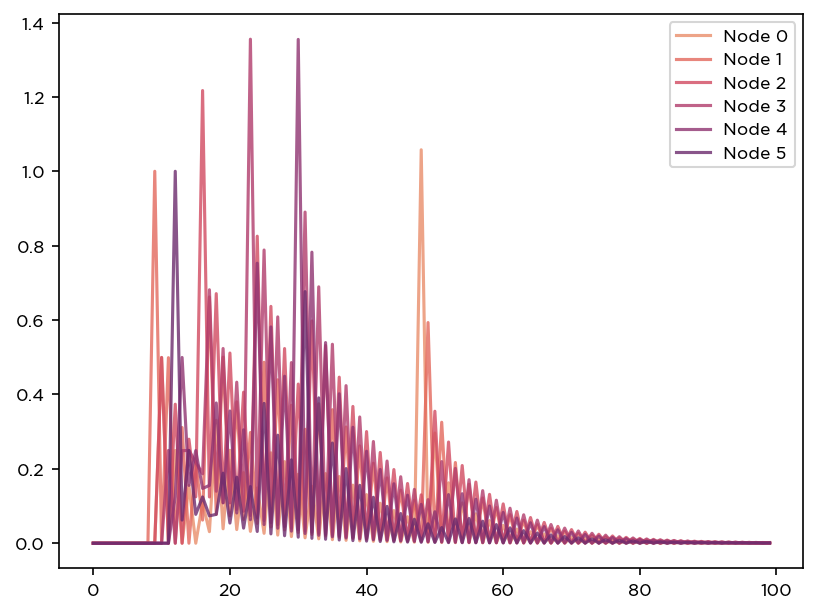

In [8]:
plt.figure(dpi=150)
with sns.color_palette("flare",n_colors=example_input.shape[0]):
    plt.plot(symmetric_chain_dynamics.T,alpha=0.8)
plt.legend(['Node 0','Node 1','Node 2','Node 3','Node 4','Node 5'])

In [9]:
cchain= communicability_bin(chain)
cchain[np.diag_indices_from(cchain)] = 0

ccchain= communicability_wei(closedchain)
ccchain[np.diag_indices_from(cchain)] = 0

csychain= communicability_wei(symmetricchain)
csychain[np.diag_indices_from(cchain)] = 0


In [10]:
lesion_params = {'adjacency_matrix': chain, 'input': example_input}
ci_chain = msa.estimate_causal_influences(elements=list(range(len(chain))),
                                        objective_function=ut.lesion_simple_nodes,
                                        objective_function_params=lesion_params,
                                        n_permutations=1_000, n_cores=1)

lesion_params['adjacency_matrix'] = closedchain
ci_closed_chain = msa.estimate_causal_influences(elements=list(range(len(chain))),
                                        objective_function=ut.lesion_simple_nodes,
                                        objective_function_params=lesion_params,
                                        n_permutations=1_000, n_cores=1)

lesion_params['adjacency_matrix'] = symmetricchain
ci_symmetric_chain = msa.estimate_causal_influences(elements=list(range(len(chain))),
                                        objective_function=ut.lesion_simple_nodes,
                                        objective_function_params=lesion_params,
                                        n_permutations=1_000, n_cores=1)



0it [00:00, ?it/s]

working on node number 0 from 6 nodes.


100%|██████████| 32/32 [00:00<00:00, 85.11it/s]
1it [00:00,  2.30it/s]

working on node number 1 from 6 nodes.


100%|██████████| 32/32 [00:00<00:00, 14224.01it/s]


working on node number 2 from 6 nodes.


100%|██████████| 32/32 [00:00<00:00, 14643.00it/s]
3it [00:00,  6.12it/s]

working on node number 3 from 6 nodes.


100%|██████████| 32/32 [00:00<00:00, 16412.05it/s]


working on node number 4 from 6 nodes.


100%|██████████| 32/32 [00:00<00:00, 18703.70it/s]
5it [00:00,  8.72it/s]

working on node number 5 from 6 nodes.


100%|██████████| 32/32 [00:00<00:00, 18978.75it/s]
6it [00:00,  7.80it/s]
0it [00:00, ?it/s]

working on node number 0 from 6 nodes.


100%|██████████| 32/32 [00:00<00:00, 139.64it/s]
1it [00:00,  3.46it/s]

working on node number 1 from 6 nodes.


100%|██████████| 32/32 [00:00<00:00, 18233.63it/s]


working on node number 2 from 6 nodes.


100%|██████████| 32/32 [00:00<00:00, 20397.83it/s]
3it [00:00,  8.28it/s]

working on node number 3 from 6 nodes.


100%|██████████| 32/32 [00:00<00:00, 20620.33it/s]


working on node number 4 from 6 nodes.


100%|██████████| 32/32 [00:00<00:00, 19978.82it/s]
5it [00:00, 11.29it/s]

working on node number 5 from 6 nodes.


100%|██████████| 32/32 [00:00<00:00, 5124.57it/s]
6it [00:00,  9.73it/s]
0it [00:00, ?it/s]

working on node number 0 from 6 nodes.


100%|██████████| 32/32 [00:00<00:00, 18186.68it/s]


working on node number 1 from 6 nodes.


100%|██████████| 32/32 [00:00<00:00, 20500.65it/s]
2it [00:00, 16.23it/s]

working on node number 2 from 6 nodes.


100%|██████████| 32/32 [00:00<00:00, 20478.75it/s]


working on node number 3 from 6 nodes.


100%|██████████| 32/32 [00:00<00:00, 18672.47it/s]
4it [00:00, 16.74it/s]

working on node number 4 from 6 nodes.


100%|██████████| 32/32 [00:00<00:00, 19732.10it/s]


working on node number 5 from 6 nodes.


100%|██████████| 32/32 [00:00<00:00, 11763.17it/s]
6it [00:00, 15.59it/s]


In [11]:
ci_chain = ci_chain.groupby(level=0).var().fillna(0)
ci_closed_chain = ci_closed_chain.groupby(level=0).var().fillna(0)
ci_symmetric_chain = ci_symmetric_chain.groupby(level=0).var().fillna(0)

In [12]:
chain_mask = np.where(cchain!=0,1,0)
closedchain_mask = np.where(ccchain!=0,1,0)
symmetricchain_mask = np.where(csychain!=0,1,0)

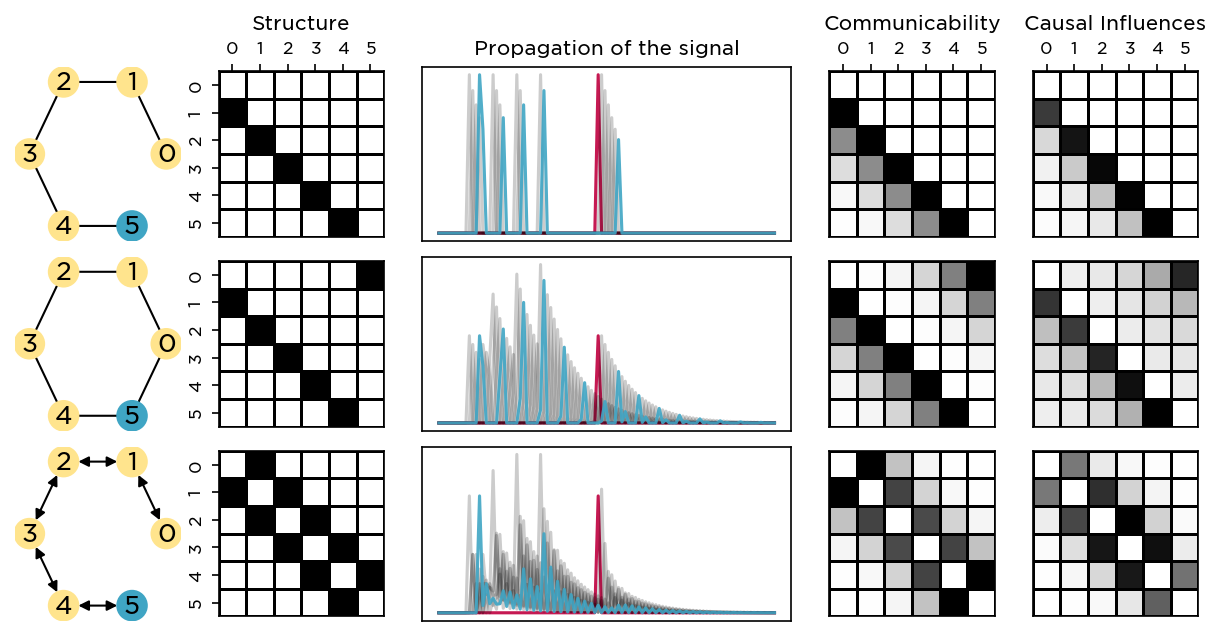

In [13]:
fig,axes = plt.subplot_mosaic([['A','X','B', 'B','CX','CIX'],
                               ['C','Y','D', 'D','CY','CIY'],
                               ['E','Z','F', 'F','CZ','CIZ']],figsize=(8,4.2),dpi=150)

#===================================== STRUCTURE
sns.heatmap(chain,
            square=True,
            cmap='binary',cbar=False,ax=axes['X'],linewidths=0.5, linecolor='k')

sns.heatmap(closedchain,
            square=True,
            cmap='binary',cbar=False,ax=axes['Y'],linewidths=0.5, linecolor='k')

sns.heatmap(symmetricchain,
            square=True,
            cmap='binary',cbar=False,ax=axes['Z'],linewidths=0.5, linecolor='k')
#===================================== COMMUNICABILITY
sns.heatmap(cchain,
            square=True,
            cmap='binary',cbar=False,ax=axes['CX'],linewidths=0.5, linecolor='k')

sns.heatmap(ccchain,
            square=True,
            cmap='binary',cbar=False,ax=axes['CY'],linewidths=0.5, linecolor='k')

sns.heatmap(csychain,
            square=True,
            cmap='binary',cbar=False,ax=axes['CZ'],linewidths=0.5, linecolor='k')
#===================================== CAUSAL INFLUENCE
sns.heatmap(ci_chain*chain_mask,
            square=True,
            cmap='binary',cbar=False,ax=axes['CIX'],linewidths=0.5, linecolor='k')

sns.heatmap(ci_closed_chain*closedchain_mask,
            square=True,
            cmap='binary',cbar=False,ax=axes['CIY'],linewidths=0.5, linecolor='k')

sns.heatmap(ci_symmetric_chain*symmetricchain_mask,
            square=True,
            cmap='binary',cbar=False,ax=axes['CIZ'],linewidths=0.5, linecolor='k')


node_colors=['#FFE48D','#FFE48D','#FFE48D','#FFE48D','#FFE48D','#3FA5C4']
nx.draw_circular(nx.from_numpy_array(chain),ax=axes['A'],
                 arrows=True,node_size=200,node_color=node_colors,with_labels=True)
nx.draw_circular(nx.from_numpy_array(closedchain),ax=axes['C'],
                 arrows=True,node_size=200,node_color=node_colors,with_labels=True)
nx.draw_circular(nx.from_numpy_array(symmetricchain),ax=axes['E'],
                 arrows=True,node_size=200,node_color=node_colors,arrowstyle='<|-|>',with_labels=True)
for ax in ['B','D','F']:
    axes[ax].plot(example_input[0],c=my_colors[-1],alpha=0.9)

    axes[ax].yaxis.set_visible(False)

for ax in ['B','C','D','Y','Z']:
    axes[ax].xaxis.set_visible(False)
for i in range(len(chain)):
    if i < len(chain)-1:
        axes['B'].plot(simple_chain_dynamics.T[:,i],c='k',alpha=0.2)
    else:
        axes['B'].plot(simple_chain_dynamics.T[:,i],c=my_colors[1],alpha=(0.9))

for i in range(len(chain)):
    if i < len(chain)-1:
        axes['D'].plot(closed_chain_dynamics.T[:,i],c='k',alpha=0.2)
    else:
        axes['D'].plot(closed_chain_dynamics.T[:,i],c=my_colors[1],alpha=(0.9))

for i in range(len(chain)):
        if i < len(chain)-1:
            axes['F'].plot(symmetric_chain_dynamics.T[:,i],c='k',alpha=0.2)
        else:
            axes['F'].plot(symmetric_chain_dynamics.T[:,i],c=my_colors[1],alpha=(0.9))

axes['B'].title.set_text('Propagation of the signal')
axes['X'].title.set_text('Structure')
axes['CX'].title.set_text('Communicability')
axes['CIX'].title.set_text('Causal Influences')

axes['B'].yaxis.tick_right()

for ax in ['X','CX','CIX']:
    axes[ax].xaxis.tick_top()
for ax in ['CY','CZ','CIY','CIZ','F']:
    axes[ax].xaxis.set_visible(False)

for ax in ['CX','CY','CZ','CIX','CIY','CIZ']:
    axes[ax].yaxis.set_visible(False)

for ax in axes:
    axes[ax].spines['right'].set_visible(True)
    axes[ax].spines['top'].set_visible(True)
    axes[ax].spines['bottom'].set_visible(True)
    axes[ax].spines['left'].set_visible(True)
fig.tight_layout(pad=0.5)

#plt.savefig(f"chain_propagation.pdf",dpi=600,bbox_inches='tight')

In [14]:
netneurotools.datasets.available_connectomes()

['celegans',
 'drosophila',
 'human_func_scale033',
 'human_func_scale060',
 'human_func_scale125',
 'human_func_scale250',
 'human_func_scale500',
 'human_struct_scale033',
 'human_struct_scale060',
 'human_struct_scale125',
 'human_struct_scale250',
 'human_struct_scale500',
 'macaque_markov',
 'macaque_modha',
 'mouse',
 'rat']

In [15]:
human = netneurotools.datasets.fetch_connectome('human_struct_scale125')

In [16]:
ut.check_symmetric(human['conn'])

True

In [17]:
connectivity = ut.spectral_normalization(0.9,human['conn'])
n_neurons = len(connectivity)
communication_mask = np.where(communicability_wei(connectivity)!=0,1,0)
chuman = ut.normer(communicability_wei(connectivity))

In [114]:
rng = np.random.default_rng(seed=SEED)
timesteps = 100
noise_strength = 0.5
noise = rng.normal(0,noise_strength,(n_neurons,timesteps))
input = noise.copy()
simple_human_dynamics = ut.simple_dynamical_system(connectivity,input)

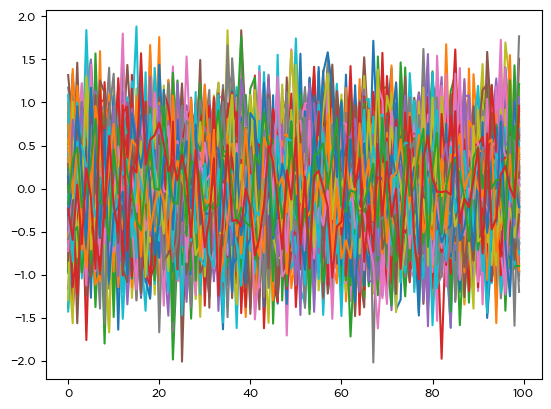

In [115]:
plt.plot(input.T);

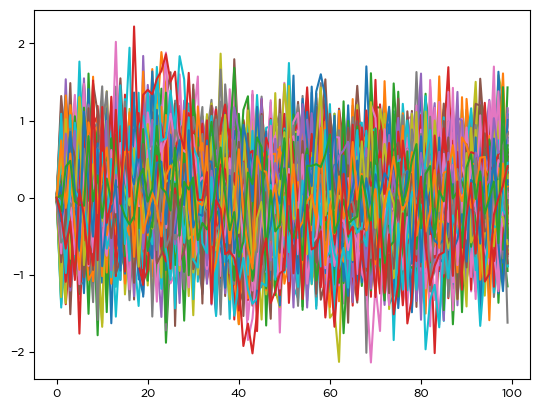

In [116]:
plt.plot(simple_human_dynamics.T);

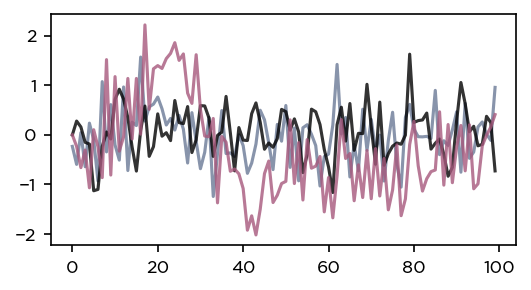

In [117]:
plt.figure(figsize=(4,2),dpi=150)
plt.plot(input[-1],alpha=0.6,color='#394D73')
plt.plot(simple_human_dynamics[117],alpha=0.8,color='k')
plt.plot(simple_human_dynamics[-1],alpha=0.8,color='#A6587C');


In [98]:
labels = {i:j for i, j in enumerate(human['labels'])}
labels

{0: 'rh_lateralorbitofrontal_1',
 1: 'rh_lateralorbitofrontal_2',
 2: 'rh_lateralorbitofrontal_3',
 3: 'rh_lateralorbitofrontal_4',
 4: 'rh_parsorbitalis_1',
 5: 'rh_frontalpole_1',
 6: 'rh_medialorbitofrontal_1',
 7: 'rh_medialorbitofrontal_2',
 8: 'rh_medialorbitofrontal_3',
 9: 'rh_parstriangularis_1',
 10: 'rh_parstriangularis_2',
 11: 'rh_parsopercularis_1',
 12: 'rh_parsopercularis_2',
 13: 'rh_rostralmiddlefrontal_1',
 14: 'rh_rostralmiddlefrontal_2',
 15: 'rh_rostralmiddlefrontal_3',
 16: 'rh_rostralmiddlefrontal_4',
 17: 'rh_rostralmiddlefrontal_5',
 18: 'rh_rostralmiddlefrontal_6',
 19: 'rh_superiorfrontal_1',
 20: 'rh_superiorfrontal_2',
 21: 'rh_superiorfrontal_3',
 22: 'rh_superiorfrontal_4',
 23: 'rh_superiorfrontal_5',
 24: 'rh_superiorfrontal_6',
 25: 'rh_superiorfrontal_7',
 26: 'rh_superiorfrontal_8',
 27: 'rh_caudalmiddlefrontal_1',
 28: 'rh_caudalmiddlefrontal_2',
 29: 'rh_caudalmiddlefrontal_3',
 30: 'rh_precentral_1',
 31: 'rh_precentral_2',
 32: 'rh_precentral_3'

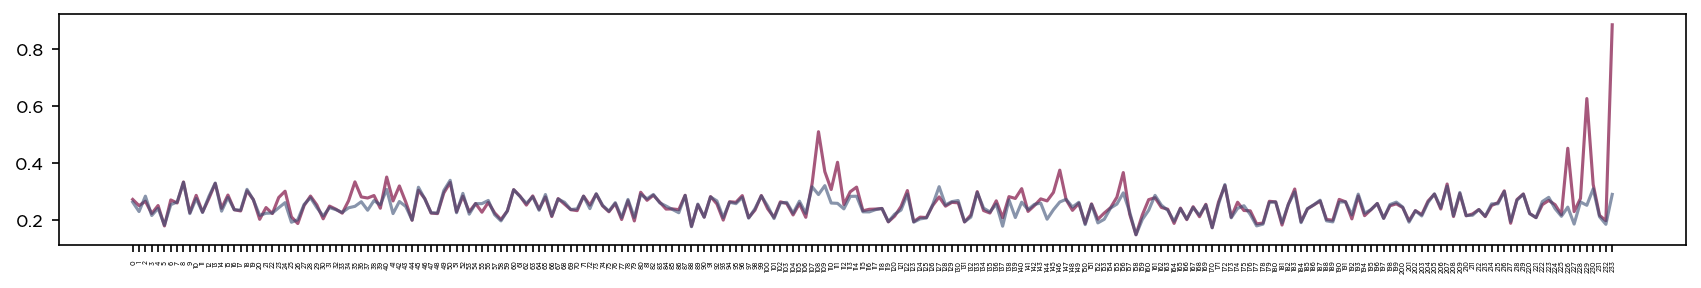

In [124]:
plt.figure(figsize=(14,2),dpi=150)
plt.plot(simple_human_dynamics.var(axis=1),color = '#A6587C')
plt.plot(input.var(axis=1),alpha=0.6,color='#394D73');
plt.xticks(np.arange(0,len(connectivity),1),rotation=90,fontsize=3);

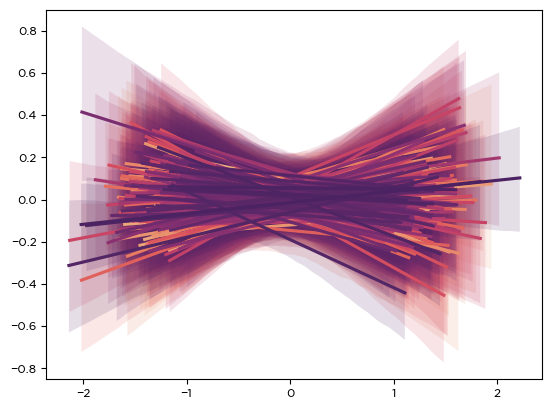

In [125]:
warnings.filterwarnings("ignore")

with sns.color_palette("flare",n_colors=len(simple_human_dynamics)):
    for node in range(len(simple_human_dynamics)):
        sns.regplot(simple_human_dynamics[node],input[node],scatter=False)


In [126]:
input_output_similarity = []
for node in range(len(simple_human_dynamics)):
    input_output_similarity.append(pearsonr(simple_human_dynamics[node],input[node])[0])

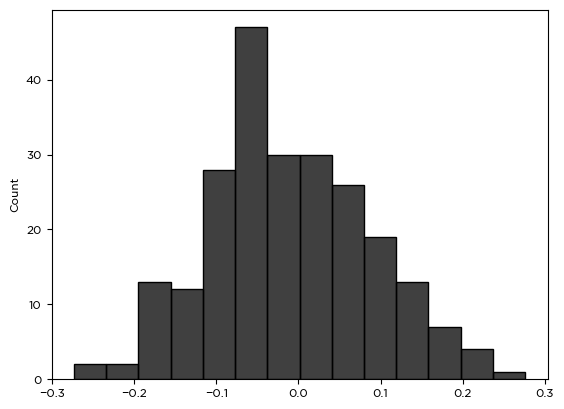

In [127]:
sns.histplot(input_output_similarity,color='k');

<AxesSubplot:>

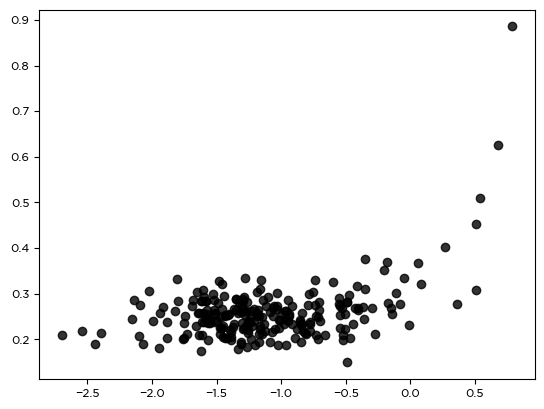

In [133]:
sns.regplot(np.log(connectivity.sum(axis=0)),simple_human_dynamics.var(axis=1),color='k',fit_reg=False)

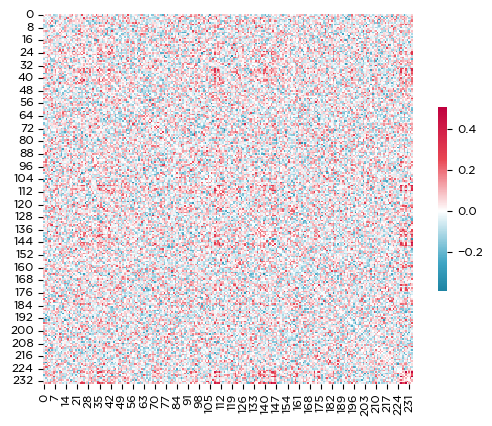

In [129]:
fc = np.corrcoef(simple_human_dynamics)
np.fill_diagonal(fc,0.)
sns.heatmap(fc,square=True,center=0,
            cmap=colormap,cbar_kws={"shrink": .5},linewidths=0., linecolor='k');

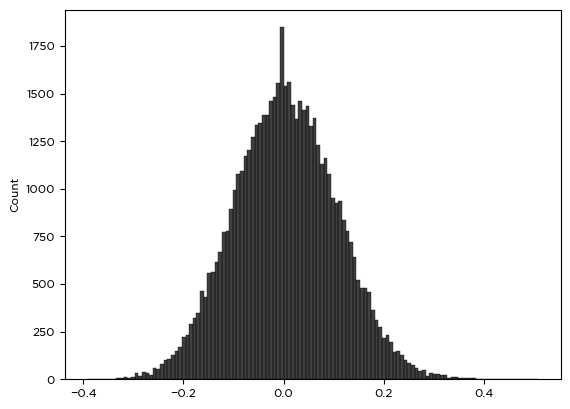

In [130]:
sns.histplot(fc.flatten(),color='k');

In [134]:
n_trials = 25
all_trials = np.zeros((len(connectivity),len(connectivity),n_trials))

In [135]:
for trial in range(n_trials):
    temp = pd.read_pickle(f'results/ci_mat_{len(connectivity)}_{trial}.pickle').groupby(level=0).var().fillna(0)
    all_trials[:,:,trial] = temp

In [136]:
averaged_ci = all_trials.mean(axis=2)
averaged_ci = pd.DataFrame(averaged_ci)

In [137]:
input_contribution = simple_human_dynamics.var(axis=1) - averaged_ci.sum(axis=1)

In [ ]:
# lesion_params = {'adjacency_matrix': connectivity, 'input': input}
# ci_mat = msa.estimate_causal_influences(elements=list(range(n_neurons)),
#                                         objective_function=ut.lesion_simple_nodes,
#                                         objective_function_params=lesion_params,
#                                         n_permutations=1_000, 
#                                         n_cores=-1,
#                                         parallelize_over_games=True)

# causal_influences = ci_mat.groupby(level=0).var().fillna(0)

# takes around 190 minutes for human_struct_scale125
# takes around 30 minutes for human_struct_scale060
# takes around 10 minutes for human_struct_scale033

In [32]:
# plt.figure(dpi=150)
# for i in range(n_neurons):
#     plt.plot(ci_mat[i][2],'k',alpha=0.3) # influence on the node
#     plt.plot(ci_mat[2][i],'r',alpha=0.3) # influenced by the node

In [154]:
normalized_ci = ut.normer(averaged_ci*communication_mask)
diff = normalized_ci - chuman
diff = ut.threshold(1,diff)
boths_outgoing = ut.make_influence_ratio(diff,axis=0)
boths_incoming = ut.make_influence_ratio(diff,axis=1)

In [73]:
cp_labels = np.load('coreness.npy',allow_pickle=True).item()


In [74]:
lhannot = '/home/kayson/ownCloud/communication-and-causation/annot/lh.lausanne2018.scale3.annot'
rhannot = '/home/kayson/ownCloud/communication-and-causation/annot/rh.lausanne2018.scale3.annot'
mlab.init_notebook('png',1024,1024)

Notebook initialized with png backend.



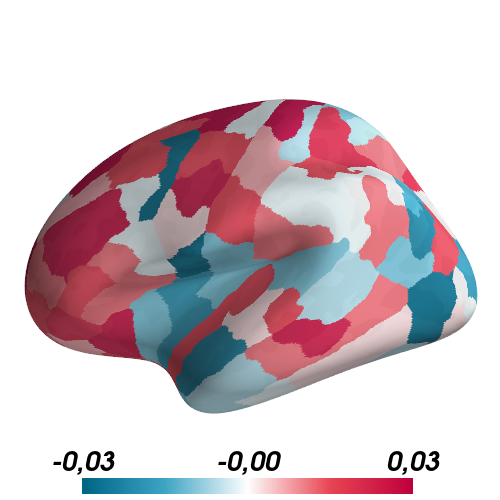


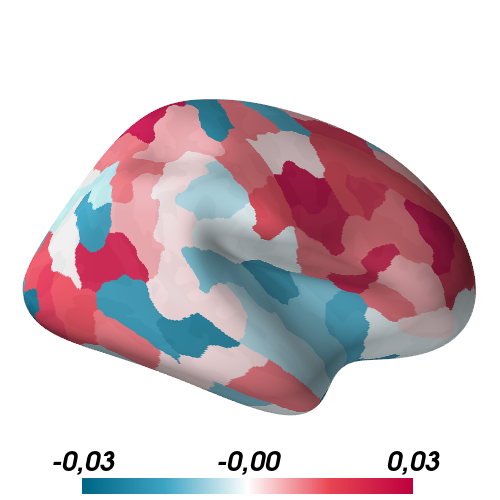


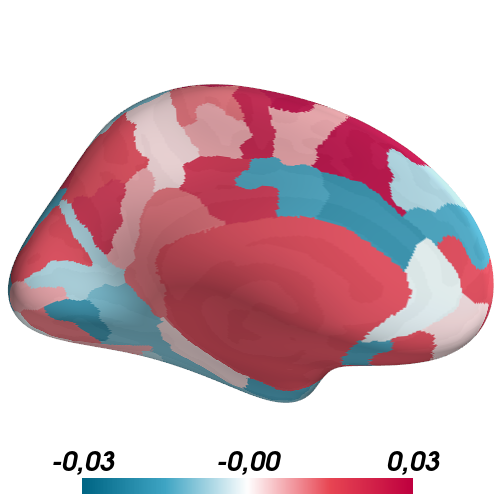


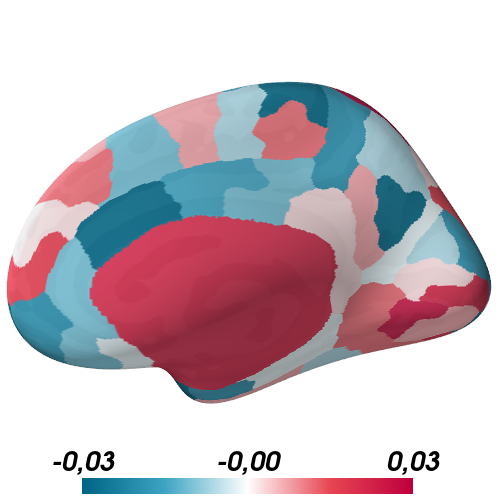

In [155]:
plot_fsaverage(boths_outgoing,lhannot=lhannot,rhannot=rhannot,order='rl'
               ,**{'colormap':colormap,'surf':'inflated','views':['lat','med'],'cortex':'low_contrast'})


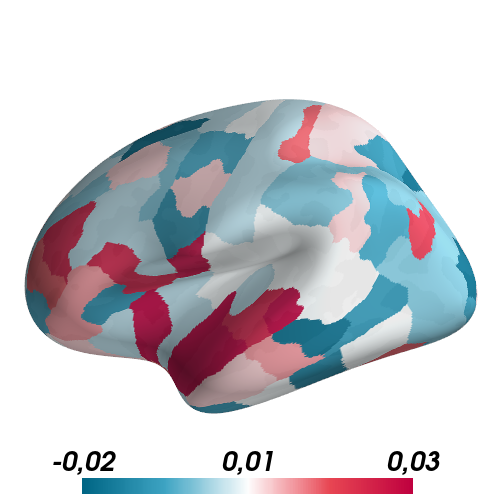


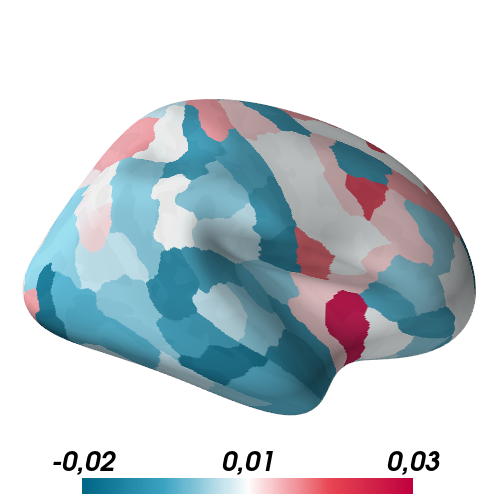


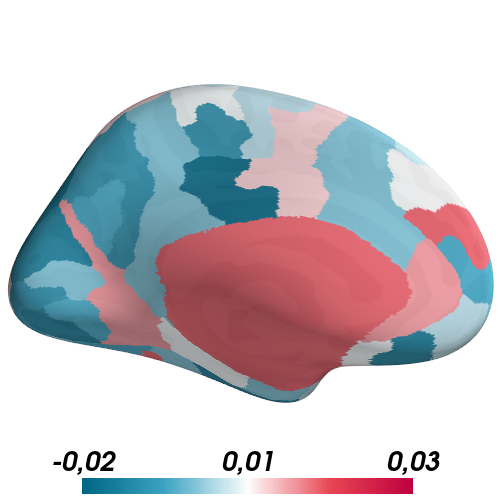


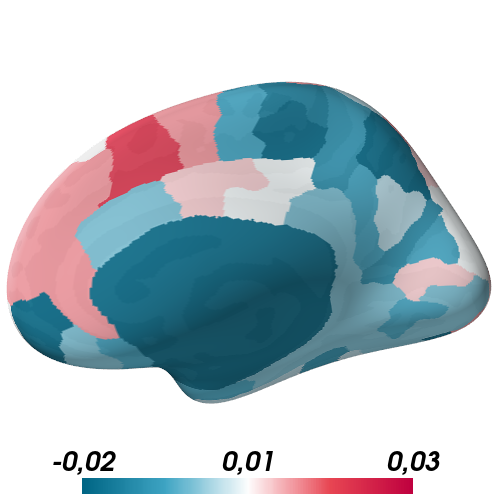

In [156]:
plot_fsaverage(boths_incoming,lhannot=lhannot,rhannot=rhannot,order='rl'
               ,**{'colormap':colormap,'surf':'inflated','views':['lat','med'],'cortex':'low_contrast'})
#mlab.savefig('test.png',size=(1024, 1024))

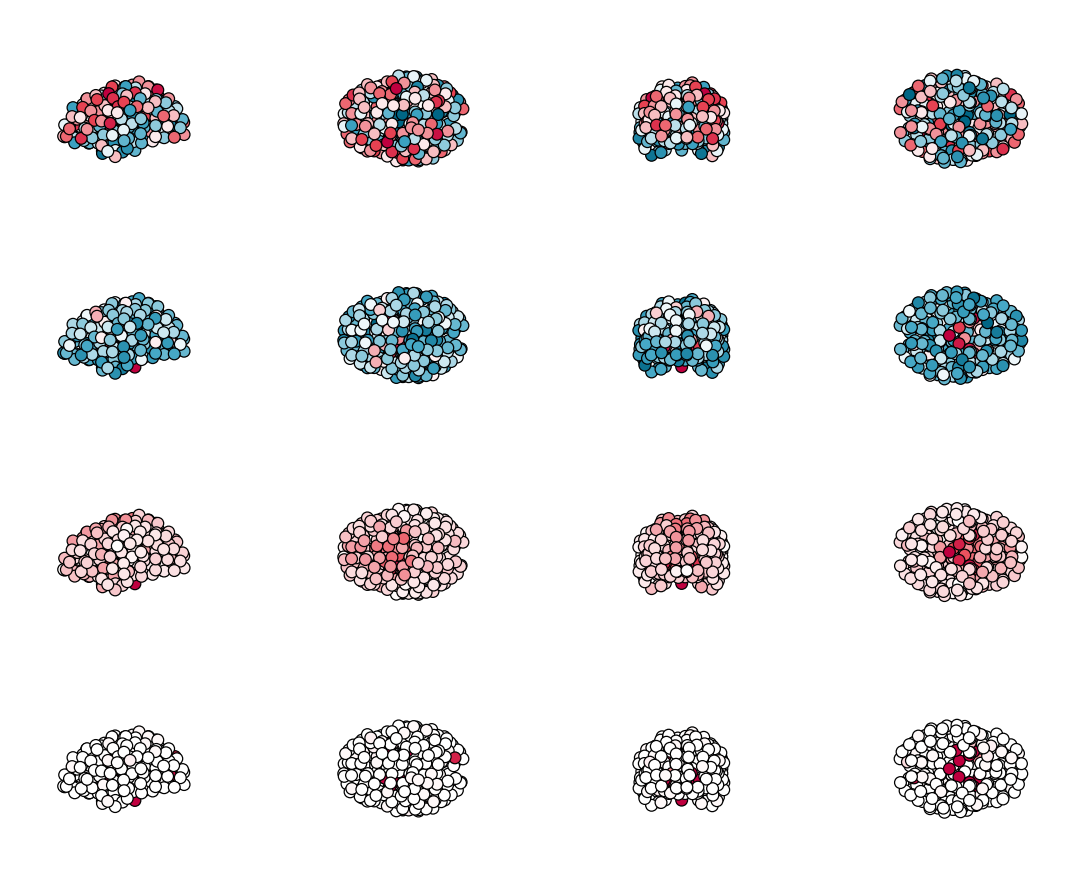

In [157]:
scatter_kw = dict(alpha=1,linewidth=0.3, edgecolor='k')
size=8
fig,axes = plt.subplot_mosaic([['A','B','C','D'],
                               ['E','F','G','H'],
                               ['L','M','N','O'],
                               ['P','Q','R','S'],],figsize=(4,3),subplot_kw=dict(projection='3d'),dpi=300)
ut.brain_plotter(boths_outgoing,human['coords'],axes['A'],view=sagittal,size=size,cmap=colormap,scatter_kwargs=scatter_kw)
ut.brain_plotter(boths_outgoing,human['coords'],axes['B'],view=axial,size=size,cmap=colormap,scatter_kwargs=scatter_kw)
ut.brain_plotter(boths_outgoing,human['coords'],axes['C'],view=coronal,size=size,cmap=colormap,scatter_kwargs=scatter_kw)
ut.brain_plotter(boths_outgoing,human['coords'],axes['D'],view=bottom,size=size,cmap=colormap,scatter_kwargs=scatter_kw)

ut.brain_plotter(boths_incoming,human['coords'],axes['E'],view=sagittal,size=size,cmap=colormap,scatter_kwargs=scatter_kw)
ut.brain_plotter(boths_incoming,human['coords'],axes['F'],view=axial,size=size,cmap=colormap,scatter_kwargs=scatter_kw)
ut.brain_plotter(boths_incoming,human['coords'],axes['G'],view=coronal,size=size,cmap=colormap,scatter_kwargs=scatter_kw)
ut.brain_plotter(boths_incoming,human['coords'],axes['H'],view=bottom,size=size,cmap=colormap,scatter_kwargs=scatter_kw)

ut.brain_plotter(connectivity.sum(axis=0),human['coords'],axes['L'],view=sagittal,size=size,cmap=redmap,scatter_kwargs=scatter_kw)
ut.brain_plotter(connectivity.sum(0),human['coords'],axes['M'],view=axial,size=size,cmap=redmap,scatter_kwargs=scatter_kw)
ut.brain_plotter(connectivity.sum(0),human['coords'],axes['N'],view=coronal,size=size,cmap=redmap,scatter_kwargs=scatter_kw)
ut.brain_plotter(connectivity.sum(0),human['coords'],axes['O'],view=bottom,size=size,cmap=redmap,scatter_kwargs=scatter_kw)

ut.brain_plotter(list(cp_labels.values()),human['coords'],axes['P'],view=sagittal,size=size,cmap=redmap,scatter_kwargs=scatter_kw)
ut.brain_plotter(list(cp_labels.values()),human['coords'],axes['Q'],view=axial,size=size,cmap=redmap,scatter_kwargs=scatter_kw)
ut.brain_plotter(list(cp_labels.values()),human['coords'],axes['R'],view=coronal,size=size,cmap=redmap,scatter_kwargs=scatter_kw)
ut.brain_plotter(list(cp_labels.values()),human['coords'],axes['S'],view=bottom,size=size,cmap=redmap,scatter_kwargs=scatter_kw)



fig.tight_layout(pad=1)

In [148]:
influencers = ut.normer(ut.threshold(0.5,normalized_ci).sum())
followers = ut.normer(ut.threshold(0.5,normalized_ci).sum(axis=1))
influence_ratio = influencers - followers

<Axes3DSubplot:label='S'>

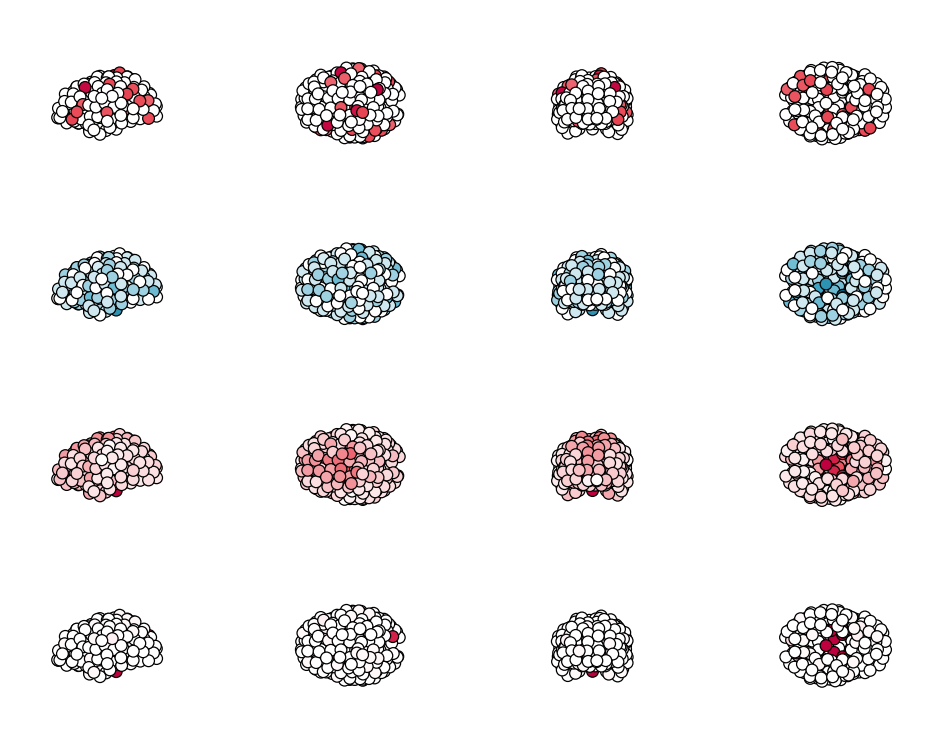

In [149]:
fig,axes = plt.subplot_mosaic([['A','B','C','D'],
                               ['E','F','G','H'],
                               ['L','M','N','O'],
                               ['P','Q','R','S'],],figsize=(4,3),subplot_kw=dict(projection='3d'),dpi=300)
ut.brain_plotter(influencers,human['coords'],axes['A'],view=sagittal,size=size,cmap=redmap,scatter_kwargs=scatter_kw)
ut.brain_plotter(influencers,human['coords'],axes['B'],view=axial,size=size,cmap=redmap,scatter_kwargs=scatter_kw)
ut.brain_plotter(influencers,human['coords'],axes['C'],view=coronal,size=size,cmap=redmap,scatter_kwargs=scatter_kw)
ut.brain_plotter(influencers,human['coords'],axes['D'],view=bottom,size=size,cmap=redmap,scatter_kwargs=scatter_kw)

ut.brain_plotter(followers,human['coords'],axes['E'],view=sagittal,size=size,cmap=bluemap,scatter_kwargs=scatter_kw)
ut.brain_plotter(followers,human['coords'],axes['F'],view=axial,size=size,cmap=bluemap,scatter_kwargs=scatter_kw)
ut.brain_plotter(followers,human['coords'],axes['G'],view=coronal,size=size,cmap=bluemap,scatter_kwargs=scatter_kw)
ut.brain_plotter(followers,human['coords'],axes['H'],view=bottom,size=size,cmap=bluemap,scatter_kwargs=scatter_kw)

ut.brain_plotter(connectivity.sum(axis=0),human['coords'],axes['L'],view=sagittal,size=size,cmap=redmap,scatter_kwargs=scatter_kw)
ut.brain_plotter(connectivity.sum(0),human['coords'],axes['M'],view=axial,size=size,cmap=redmap,scatter_kwargs=scatter_kw)
ut.brain_plotter(connectivity.sum(0),human['coords'],axes['N'],view=coronal,size=size,cmap=redmap,scatter_kwargs=scatter_kw)
ut.brain_plotter(connectivity.sum(0),human['coords'],axes['O'],view=bottom,size=size,cmap=redmap,scatter_kwargs=scatter_kw)

ut.brain_plotter(list(cp_labels.values()),human['coords'],axes['P'],view=sagittal,size=size,cmap=redmap,scatter_kwargs=scatter_kw)
ut.brain_plotter(list(cp_labels.values()),human['coords'],axes['Q'],view=axial,size=size,cmap=redmap,scatter_kwargs=scatter_kw)
ut.brain_plotter(list(cp_labels.values()),human['coords'],axes['R'],view=coronal,size=size,cmap=redmap,scatter_kwargs=scatter_kw)
ut.brain_plotter(list(cp_labels.values()),human['coords'],axes['S'],view=bottom,size=size,cmap=redmap,scatter_kwargs=scatter_kw)


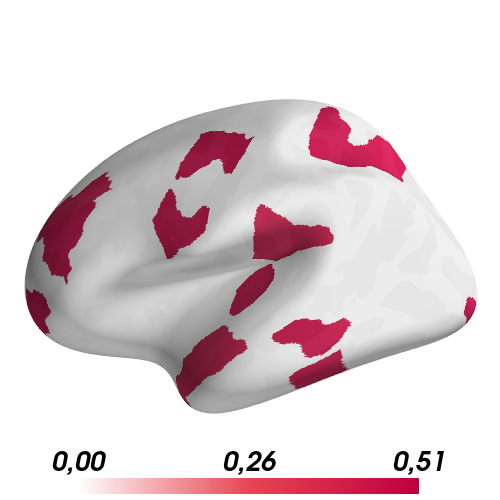


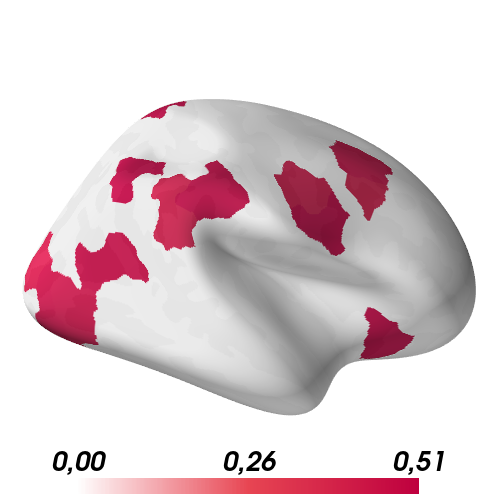


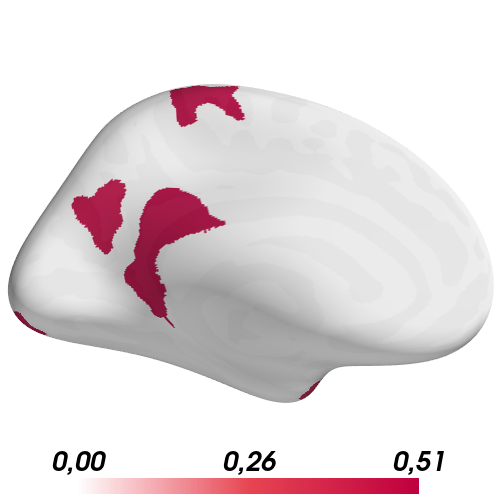


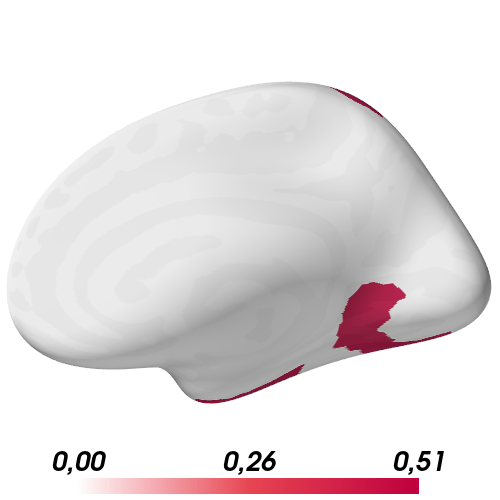

In [158]:
plot_fsaverage(influencers,lhannot=lhannot,rhannot=rhannot,order='rl'
               ,**{'colormap':redmap,'surf':'inflated','views':['lat','med'],'cortex':'low_contrast'})

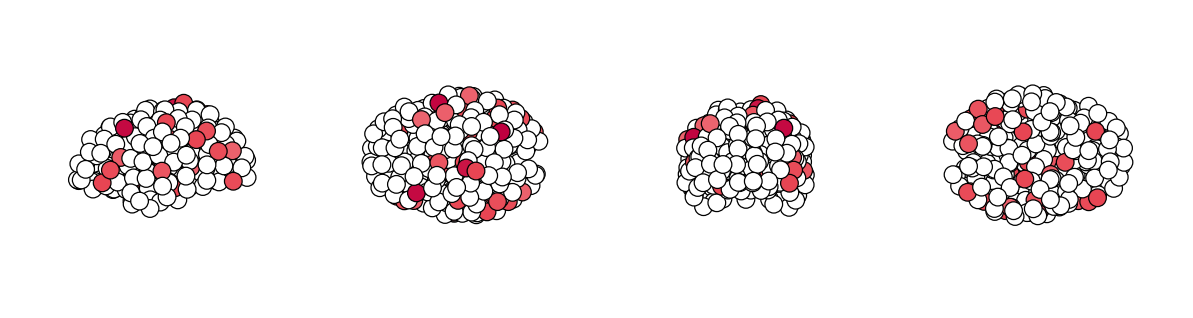

In [159]:
scatter_kw = dict(alpha=1,linewidth=0.3, edgecolor='k')
size=18
fig,axes = plt.subplot_mosaic([['A','B','C','D']],figsize=(4,2),subplot_kw=dict(projection='3d'),dpi=300)
ut.brain_plotter(influencers,human['coords'],axes['A'],view=sagittal,size=size,cmap=redmap,scatter_kwargs=scatter_kw)
ut.brain_plotter(influencers,human['coords'],axes['B'],view=axial,size=size,cmap=redmap,scatter_kwargs=scatter_kw)
ut.brain_plotter(influencers,human['coords'],axes['C'],view=coronal,size=size,cmap=redmap,scatter_kwargs=scatter_kw)
ut.brain_plotter(influencers,human['coords'],axes['D'],view=bottom,size=size,cmap=redmap,scatter_kwargs=scatter_kw)
fig.tight_layout(pad=1)

In [160]:
log_ci = np.abs(np.nan_to_num(np.log(normalized_ci),neginf=0))
log_comm = np.abs(np.nan_to_num(np.log(chuman),neginf=0))
log_sc = np.abs(np.nan_to_num(np.log(ut.normer(connectivity)),neginf=0))

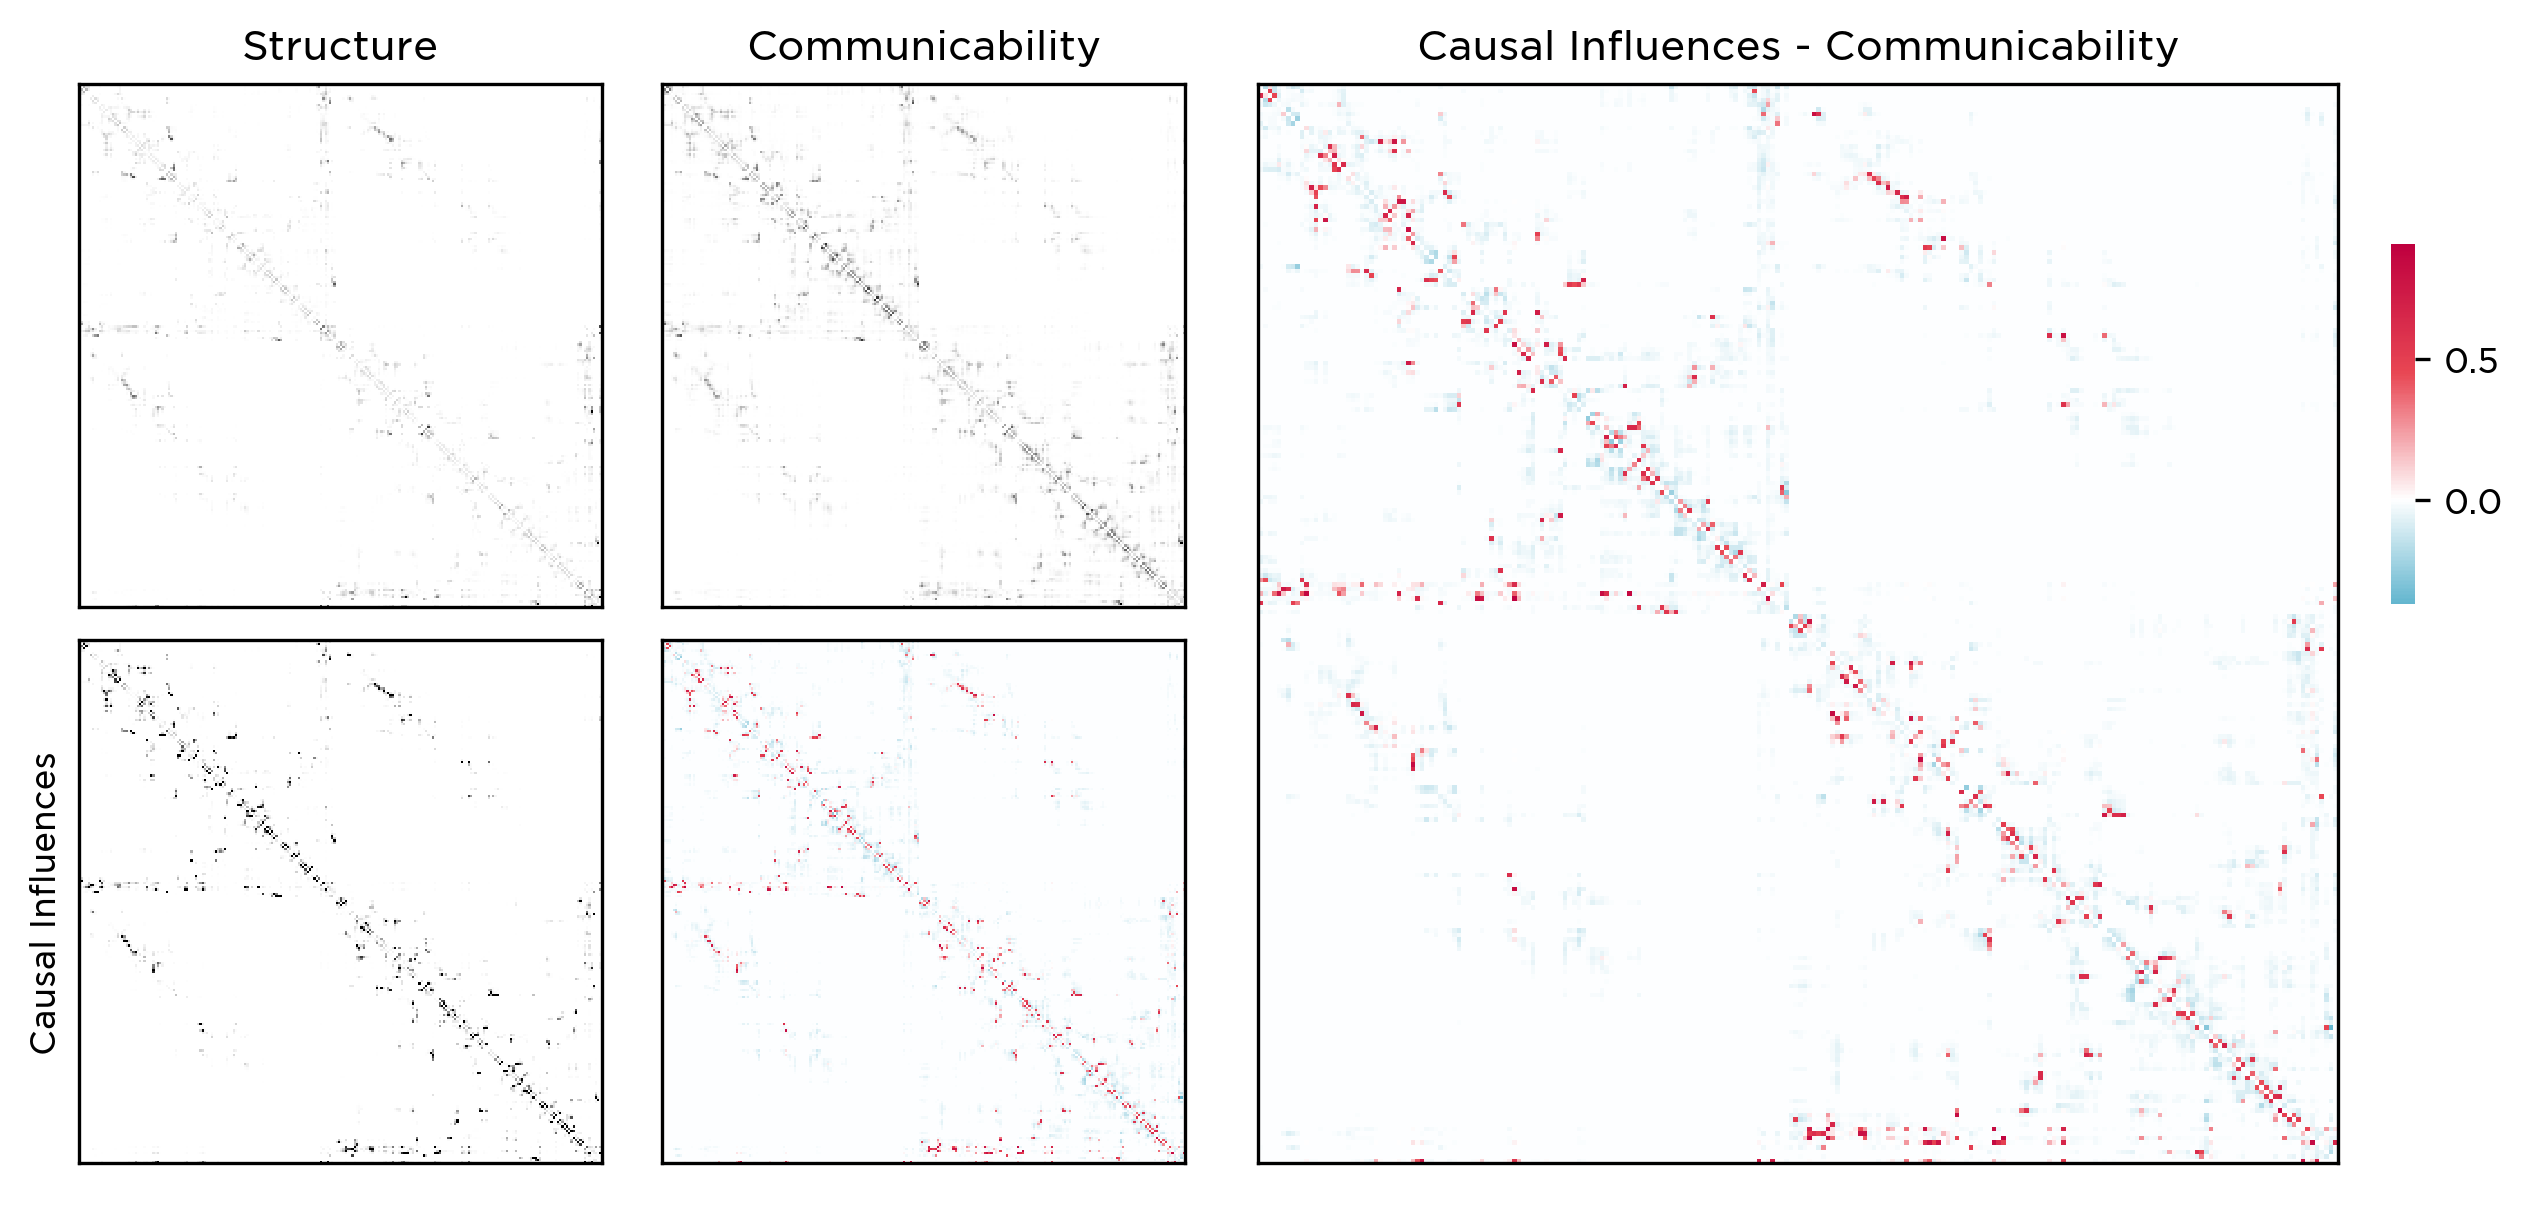

In [161]:
fig,axes = plt.subplot_mosaic([['A','CA','Z','Z'],
                               ['CI','DI','Z','Z']],figsize=(8,4),dpi=300)
cbar_ax = fig.add_axes([1, .5, .01, .3])

sns.heatmap(ut.normer(connectivity),square=True,xticklabels=False,yticklabels=False,
            cmap='binary',cbar=False,ax=axes['A'],linewidths=0, linecolor='k')
sns.heatmap(chuman,square=True,xticklabels=False,yticklabels=False,
            cmap='binary',cbar=False,ax=axes['CA'],linewidths=0, linecolor='k')

sns.heatmap(normalized_ci*communication_mask,square=True,xticklabels=False,yticklabels=False,
            cmap='binary',cbar=False,ax=axes['CI'],linewidths=0, linecolor='k')
sns.heatmap((normalized_ci - chuman),square=True,xticklabels=False,yticklabels=False,center=0,
            cmap=colormap,cbar=False,ax=axes['DI'],linewidths=0, linecolor='k')
sns.heatmap((normalized_ci - chuman),square=True,xticklabels=False,yticklabels=False,center=0,
            cmap=colormap,cbar_ax=cbar_ax,ax=axes['Z'],linewidths=0.0)
for ax in axes:
    axes[ax].spines['right'].set_visible(True)
    axes[ax].spines['top'].set_visible(True)
    axes[ax].spines['bottom'].set_visible(True)
    axes[ax].spines['left'].set_visible(True)

axes['A'].title.set_text('Structure')
axes['CA'].title.set_text('Communicability')
axes['Z'].title.set_text('Causal Influences - Communicability')
axes['CI'].set_ylabel("Causal Influences")

fig.tight_layout(pad=1)
#plt.savefig(f"human_propagation.pdf",dpi=600,bbox_inches='tight')

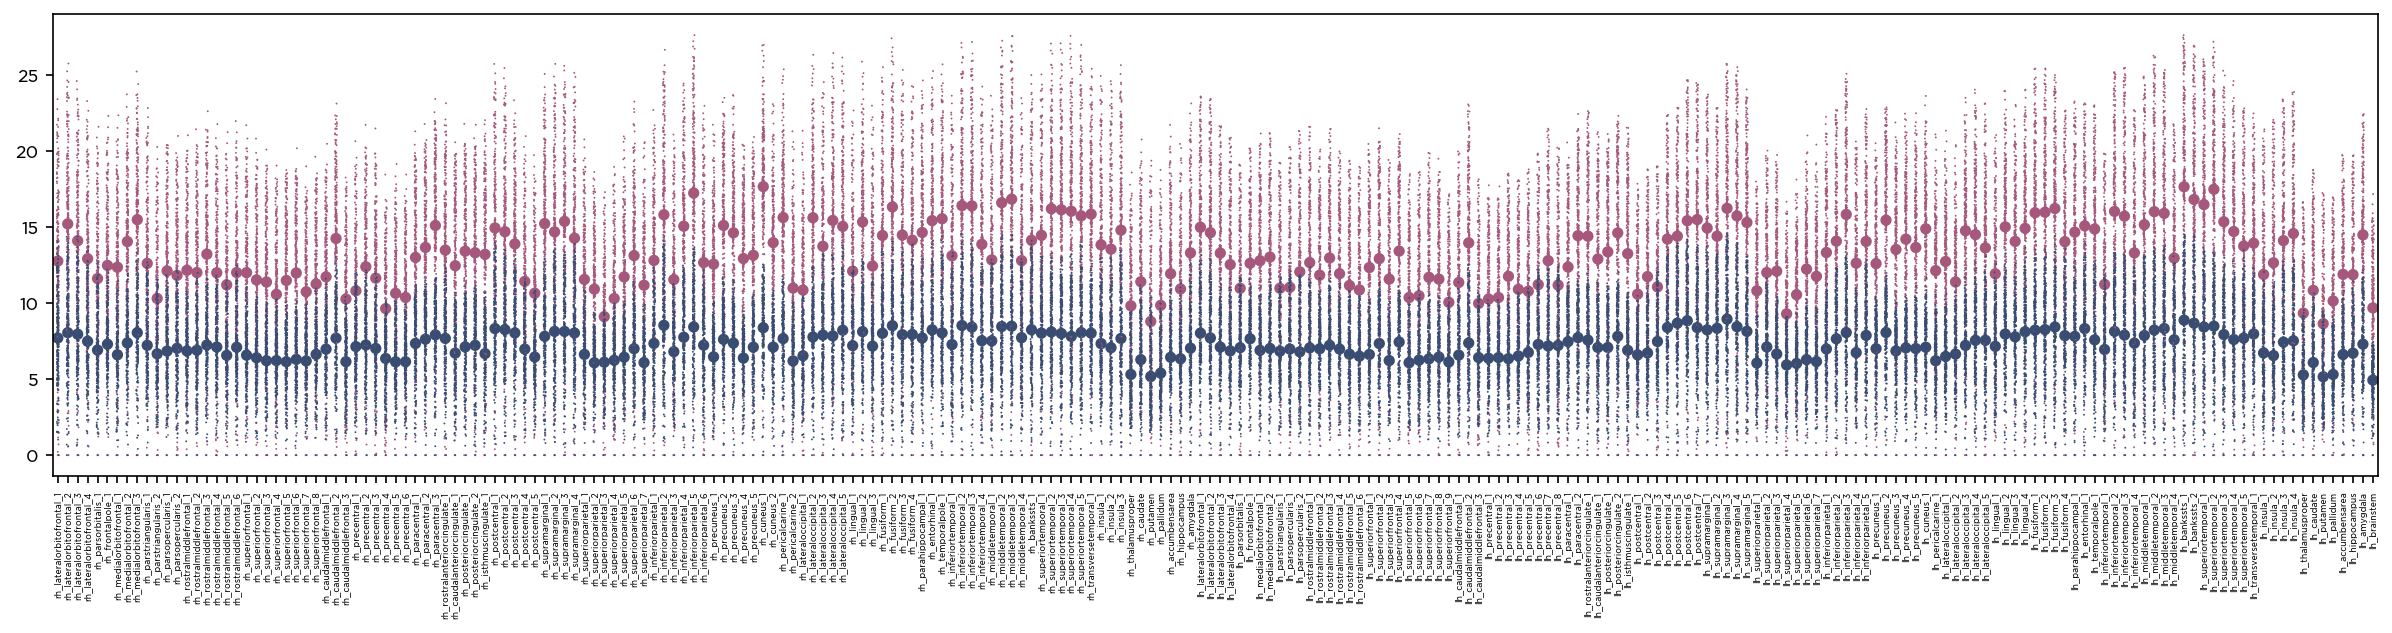

In [46]:
plt.figure(figsize=(20,4),dpi=150)
sns.pointplot(data=log_ci,color='#A6587C',label='Causal Influence',join=False,markers='.',errwidth=0.8) #red
sns.pointplot(data=log_comm,color='#394D73',label='Communicability',join=False,markers='.',errwidth=0.8)

sns.stripplot(data=log_ci,color='#A6587C',label='Causal Influence',size=0.9) #red
sns.stripplot(data=log_comm,color='#394D73',label='Communicability',size=0.9)
plt.xticks(ticks = [i for i,_ in enumerate(human.labels)],labels=human.labels,rotation=90,fontsize=4);

(-0.5, 28.5)

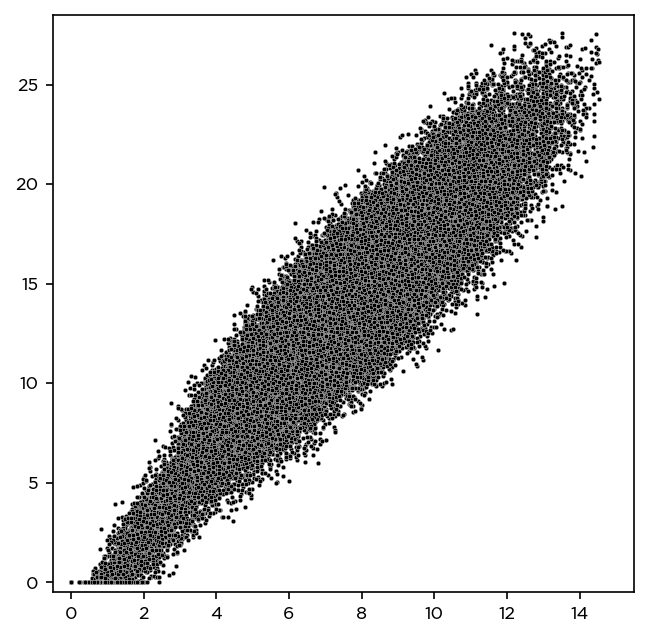

In [162]:
plt.figure(figsize=(5,5),dpi=150)
sns.scatterplot(x=log_comm.flatten(),y=log_ci.flatten(),color='k',s=5)
plt.xlim(-0.5,15.5)
plt.ylim(-0.5,28.5)

<AxesSubplot:>

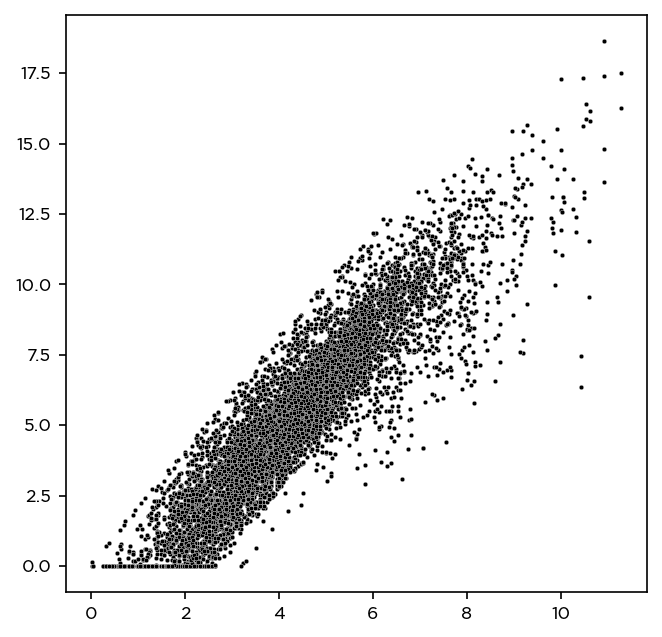

In [163]:
plt.figure(figsize=(5,5),dpi=150)
sns.scatterplot(x=log_sc.flatten()[log_sc.flatten()!=0],y=log_ci.flatten()[log_sc.flatten()!=0],color='k',s=5)

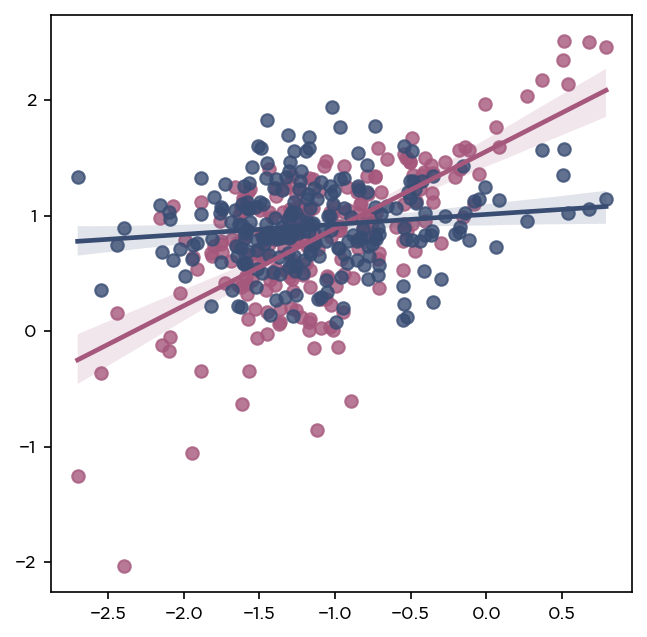

In [164]:
plt.figure(figsize=(5,5),dpi=150)
sns.regplot(np.log(connectivity.sum(axis=1)),np.log(normalized_ci.sum(axis=1)),color='#A6587C') #lila, in-degree
sns.regplot(np.log(connectivity.sum(axis=0)),np.log(normalized_ci.sum(axis=0)),color='#394D73');

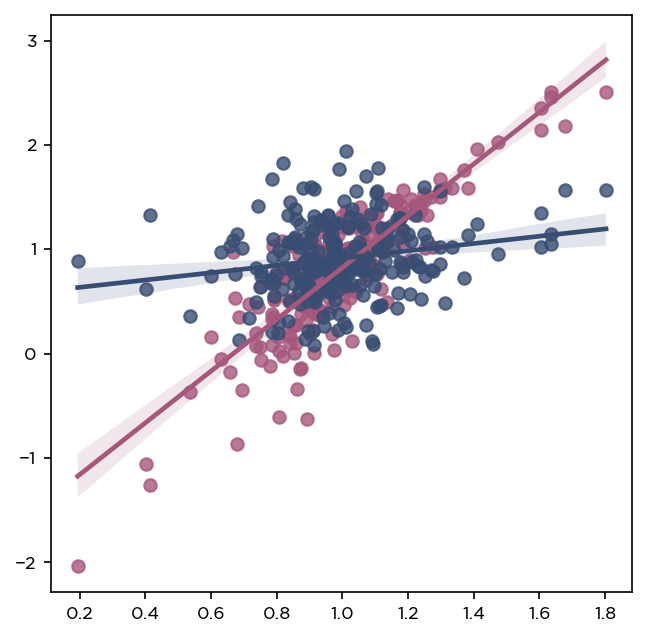

In [174]:
plt.figure(figsize=(5,5),dpi=150)
sns.regplot(np.log(chuman.sum(axis=1)),np.log(normalized_ci.sum(axis=1)),color='#A6587C') #lila, in-degree
sns.regplot(np.log(chuman.sum(axis=0)),np.log(normalized_ci.sum(axis=0)),color='#394D73');

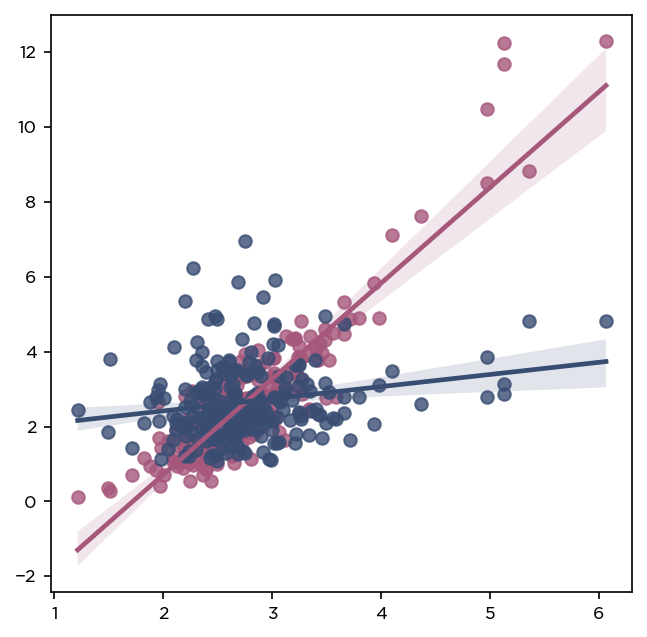

In [175]:
plt.figure(figsize=(5,5),dpi=150)
sns.regplot(chuman.sum(axis=1),normalized_ci.sum(axis=1),color='#A6587C') #lila, in-degree
sns.regplot(chuman.sum(axis=0),normalized_ci.sum(axis=0),color='#394D73');

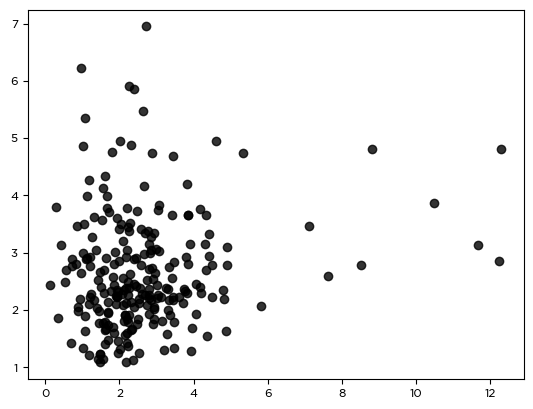

In [51]:
sns.regplot(normalized_ci.sum(axis=1),normalized_ci.sum(axis=0),color='k',fit_reg=False);